In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

plt.style.use('default')

<b> Numba implementation of Random Walk (2D) in 8 directions </b>
<br>
[Adapted from: geeksforgeeks](https://www.geeksforgeeks.org/random-walk-implementation-python/)

In [2]:
@jit(nopython=True)
def random_walk_2d_n8(nwalks):
    # Arrays to store x, y coordinates
    x = np.zeros(nwalks)
    y = np.zeros(nwalks)
    
    # 8 directions
    n8 = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]
    for n in range(nwalks):
        idx = np.random.choice(len(n8), 1)[0]
        x[n] = x[n - 1] + n8[idx][0]
        y[n] = y[n - 1] + n8[idx][1]          
    return x, y

In [3]:
x, y = random_walk_2d_n8(nwalks=10000000)

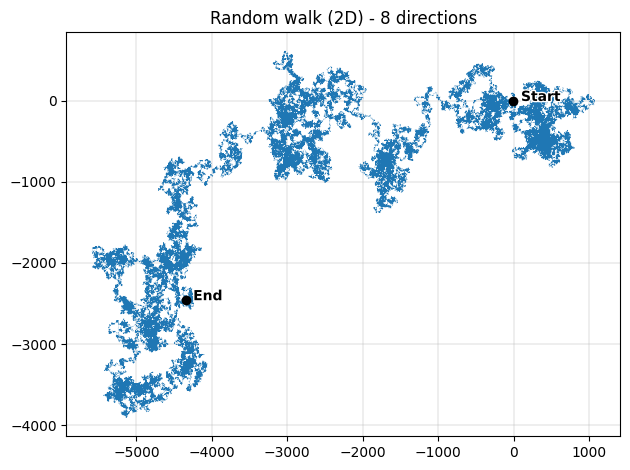

In [4]:
# Show the result
fig, ax = plt.subplots()
ax.set_title("Random walk (2D) - 8 directions")

# Plot the lines
ax.plot(x, y, lw= 0.05)

# Start point
ax.scatter(x[0], y[0], zorder=5, c="k")
ax.annotate("Start", (x[0] + 100, y[0]), zorder=5, c="k", weight="bold",
            path_effects=[pe.withStroke(linewidth=2, foreground="white")])
# End point
ax.scatter(x[-1], y[-1], zorder=5, c="k")
ax.annotate("End", (x[-1] + 100, y[-1]), zorder=5, c="k", weight="bold",
            path_effects=[pe.withStroke(linewidth=2, foreground="white")])

ax.grid(linewidth=0.3)
plt.tight_layout()

<b> Numba vs Loop: 10M walks </b>

%%timeit results with @jit(nopython=True) decorator:<br>
😍 <b>Numba</b>: 1.15 s ± 29.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

%%timeit results without @jit(nopython=True) decorator:<br>
😴 <b>Loop</b>: 3min 33s ± 11.9 s per loop (mean ± std. dev. of 7 runs, 1 loop each)